# Natural Language Processing

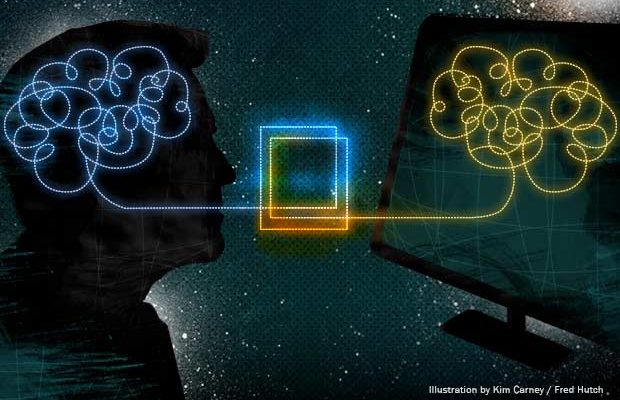

# Sentiment Analysiz and Sentiment Modeling

## About Dataset:

#### This dataset contains conversations between users and experienced psychologists related to mental health topics. Carefully collected and anonymized, the data can be used to further the development of Natural Language Processing (NLP) models which focus on providing mental health advice and guidance. It consists of a variety of questions which will help train NLP models to provide users with appropriate advice in response to their queries. 


#### This dataset contains conversations between users and experienced psychologists about important mental health topics

#### Context: The conversation between the user and the psychologist. (Text)
#### Response: The response from the psychologist to the user. (Text)

# import packages

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


!pip install nltk
!pip install textblob
!pip install wordcloud

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


In [2]:
df = pd.read_csv("/kaggle/input/nlp-mental-health-conversations/train.csv")
df.shape

(3512, 2)

In [3]:
df.head()

,Context,Response
0,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this has not happened to you. Still, you should watch out for this because it can be a sign of a worsening depression. If you begin to think about this, it is important to reach out to a support system right away. The National Suicide Prevention Lifeline is 1-800-273-8255. The text line is #741741. I hope some other colleagues will provide you more suggestions. Be well...Robin Landwehr, DBH, LPCC"
2,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How

In [4]:
# random responce:

random_response = df["Response"][1:2]
print("before text preprocessing len: ", len(df["Response"][1]))

before text preprocessing len:  2082


# Text Preprocessing

In [5]:
# Normalizing Case Folding

df["Context"] = df["Context"].str.lower()
df["Response"] = df["Response"].str.lower()

In [6]:
# Remove Punctuations

df["Context"] = df["Context"].str.replace('[^\w\s]', '')
df["Response"] = df["Response"].str.replace('[^\w\s]', '')

In [7]:
# Remove Numbers

df["Context"] = df["Context"].str.replace('\d', '')
df["Response"] = df["Response"].str.replace('\d', '')

In [8]:
# Remove Stopwords (a, an, and, as, at, but, by, for, if, is, it, on, of, or, s, that, their, the, then, these ...)

sw = stopwords.words('english')

df["Context"] = df["Context"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Response"] = df["Response"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [9]:
# let' s check random response:

print("after text preprocessing len: ",len(df["Response"][1]))

after text preprocessing len:  1300


In [10]:
# Remove Rarewords:

# Let's remove words used less than 1
temp_Context = pd.Series(' '.join(df['Context']).split()).value_counts()
drops = temp_Context[temp_Context <= 1]
df['Context'] = df['Context'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

temp_Response = pd.Series(' '.join(df['Response']).split()).value_counts()
drops = temp_Response[temp_Response <= 1]
df['Response'] = df['Response'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [11]:
import re

# fallback tokenizer using regex (extracts word characters)
tokenize_simple = lambda text: re.findall(r"\b\w+\b", str(text))

df['Context_tokens'] = df['Context'].fillna('').astype(str).apply(tokenize_simple)
df['Response_tokens'] = df['Response'].fillna('').astype(str).apply(tokenize_simple)

print(df[['Context_tokens', 'Response_tokens']].head(1))


                                                                                                                                                                                                                                Context_tokens  \
0  [i, m, going, things, feelings, myself, barely, sleep, nothing, think, i, m, worthless, here, i, ve, never, tried, contemplated, suicide, i, ve, always, wanted, fix, issues, never, get, around, it, change, feeling, worthless, everyone]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [12]:
# Lemmatization

df["Context"] = df["Context"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df["Response"] = df["Response"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [13]:
# let' s check random response:

print("after tokenizateion and lemmatization len: ",len(df["Response"][1]))

after tokenizateion and lemmatization len:  1200


# Text Visualization

In [14]:
# Calculating term frequencies:

tf_Context = df["Context"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Context.columns = ["words", "tf"]
tf_Context.sort_values("tf", ascending=False)

,words,tf
0,i'm,1603.00
76,feel,1315.00
75,like,1145.00
63,know,989.00
10,get,985.00
...,...,...
3751,"lying,",2.00
2712,fat.,2.00
2713,flaunt,2.00
3748,"name,",2.00


In [15]:
# Calculating term frequencies:

tf_Response = df["Response"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_Response.columns = ["words", "tf"]
tf_Response.sort_values("tf", ascending=False)

,words,tf
11,may,2890.00
6,feel,2877.00
363,would,2343.00
157,help,2194.00
123,like,2155.00
...,...,...
10915,tecnicas,2.00
10916,aceptación,2.00
10917,ayudaran,2.00
10918,motivan,2.00


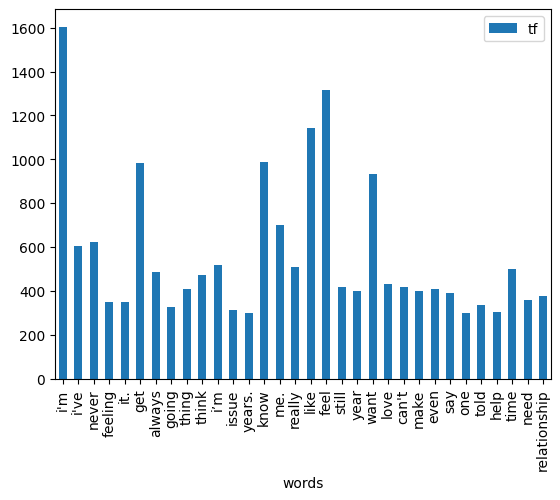

In [16]:
# Barplot for Context

tf_Context[tf_Context["tf"] > 300].plot.bar(x="words", y="tf")
plt.show()

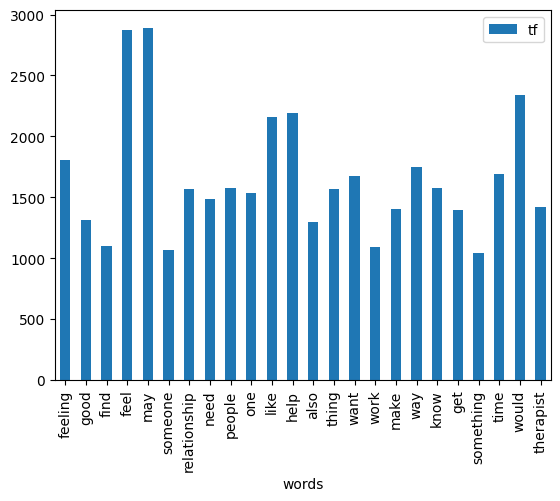

In [17]:
# Barplot for Response

tf_Response[tf_Response["tf"] > 1000].plot.bar(x="words", y="tf")
plt.show()

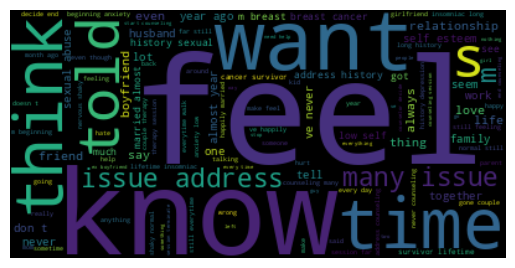

In [18]:
# Wordcloud for Context

text_Context = " ".join(i for i in df.Context)

wordcloud = WordCloud().generate(text_Context)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

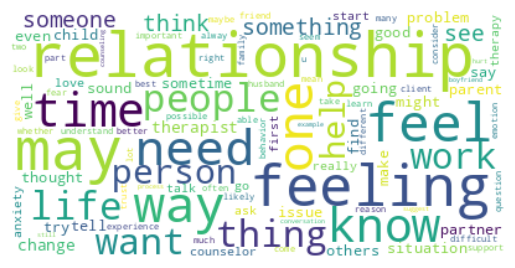

In [19]:
# Wordcloud for Response

text_Response = " ".join(i for i in df.Response)

wordcloud_Response = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text_Response)
plt.figure()
plt.imshow(wordcloud_Response, interpolation="bilinear")
plt.axis("off")
plt.show()

# wordcloud.to_file("wordcloud.png") # kaydetmek istersek

# Sentiment Analysis

In [20]:
sia = SentimentIntensityAnalyzer() #nltk library

In [21]:
df["polarity_score_Context"] = df["Context"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Context"]

0       0.86
1       0.86
2       0.86
3       0.86
4       0.86
        ... 
3507   -0.49
3508   -0.38
3509   -0.92
3510   -0.62
3511   -0.83
Name: polarity_score_Context, Length: 3512, dtype: float64

In [22]:
df["polarity_score_Response"] = df["Response"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score_Response"]

0       0.88
1       0.97
2       0.80
3       0.25
4       0.46
        ... 
3507   -0.80
3508   -0.78
3509    0.98
3510    0.87
3511   -0.20
Name: polarity_score_Response, Length: 3512, dtype: float64

# Feature Engineering

In [23]:
df["sentiment_label_Context"] = df["Context"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
                                           

In [24]:
df["sentiment_label_Context"].value_counts()

sentiment_label_Context
neg    2325
pos    1187
Name: count, dtype: int64

In [25]:
df["sentiment_label_Response"] = df["Response"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.columns

Index(['Context', 'Response', 'Context_tokens', 'Response_tokens', 'polarity_score_Context', 'polarity_score_Response', 'sentiment_label_Context', 'sentiment_label_Response'], dtype='object')

In [26]:
df[['polarity_score_Context', 'polarity_score_Response', 
    'sentiment_label_Context', 'sentiment_label_Response']]

,polarity_score_Context,polarity_score_Response,sentiment_label_Context,sentiment_label_Response
0,0.86,0.88,pos,pos
1,0.86,0.97,pos,pos
2,0.86,0.80,pos,pos
3,0.86,0.25,pos,pos
4,0.86,0.46,pos,pos
...,...,...,...,...
3507,-0.49,-0.80,neg,neg
3508,-0.38,-0.78,neg,neg
3509,-0.92,0.98,neg,pos
3510,-0.62,0.87,neg,pos


In [27]:
df["sentiment_label_Response"].value_counts() 

sentiment_label_Response
pos    2889
neg     623
Name: count, dtype: int64

# LabelEncoder

In [28]:
df["sentiment_label_Context"] = LabelEncoder().fit_transform(df["sentiment_label_Context"])
df["sentiment_label_Response"] = LabelEncoder().fit_transform(df["sentiment_label_Response"])

In [29]:

y = df["sentiment_label_Response"] # target, dependent variable
X = df["Response"] # independent variable


# Count Vectors

In [30]:
# Count Vectors:

vectorizer = CountVectorizer()
X_countvector = vectorizer.fit_transform(X)

In [31]:
first5_words = vectorizer.get_feature_names_out()[:5]

word_frequencies = X_countvector.toarray()

for i, word in enumerate(first5_words):
    print(f"{word}: {word_frequencies[:, i]}")

00: [0 0 0 ... 0 0 0]
02: [0 0 0 ... 0 0 0]
06: [0 0 0 ... 0 0 0]
080241270x: [0 0 0 ... 0 0 0]
09: [0 0 0 ... 0 0 0]


In [32]:
# TF-IDF Vectors:

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
X_tf_idf_word

<3512x9896 sparse matrix of type '<class 'numpy.float64'>'
	with 241821 stored elements in Compressed Sparse Row format>

# Sentiment Modeling

              precision    recall  f1-score   support

           0       0.89      0.16      0.27       206
           1       0.85      1.00      0.91       953

    accuracy                           0.85      1159
   macro avg       0.87      0.58      0.59      1159
weighted avg       0.85      0.85      0.80      1159



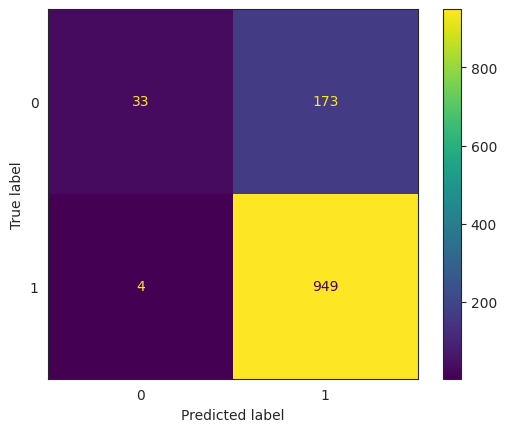

In [33]:
# TF-IDF;

X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word , y, test_size=0.33, random_state=1)

lr = LogisticRegression()
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81       206
           1       0.95      0.98      0.96       953

    accuracy                           0.94      1159
   macro avg       0.93      0.86      0.89      1159
weighted avg       0.94      0.94      0.94      1159



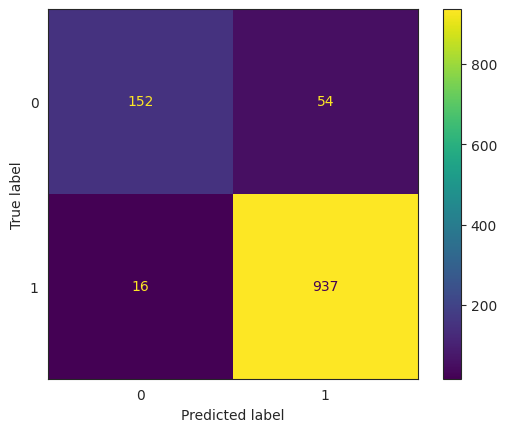

In [34]:
# Count vector:

X_train, X_test, y_train, y_test = train_test_split(X_countvector , y, test_size=0.33, random_state=1)

lr = LogisticRegression()
sns.set_style('white')
pipe_lr = make_pipeline(lr)
pipe_lr.fit(X_train,y_train)
pred = pipe_lr.predict(X_test)
print(classification_report(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()
score_lr = accuracy_score(y_test,pred)


# Naives Bayes

=== Naive Bayes Results ===
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       206
           1       0.82      1.00      0.90       953

    accuracy                           0.82      1159
   macro avg       0.91      0.50      0.46      1159
weighted avg       0.85      0.82      0.74      1159

Naive Bayes Accuracy: 0.823123382226057


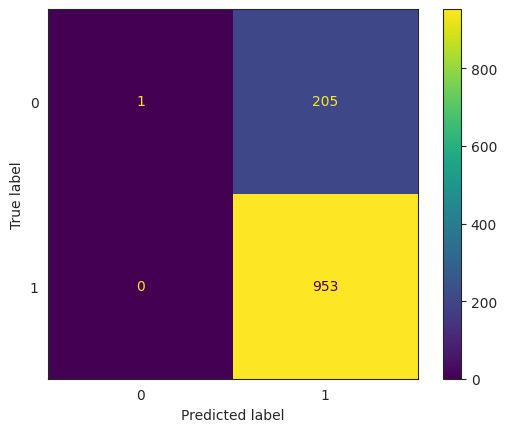

In [35]:
from sklearn.naive_bayes import MultinomialNB

# Train-test split (TF-IDF features)
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word, y, test_size=0.33, random_state=1)

# Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("=== Naive Bayes Results ===")
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot()

# Accuracy
score_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", score_nb)


# SVM

=== Support Vector Machine (SVM) Results ===
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       206
           1       0.94      0.99      0.96       953

    accuracy                           0.93      1159
   macro avg       0.92      0.83      0.87      1159
weighted avg       0.93      0.93      0.93      1159

SVM Accuracy: 0.9318377911993098


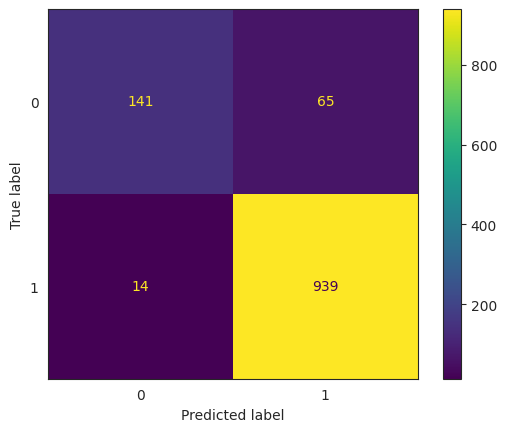

In [36]:
from sklearn.svm import LinearSVC

# Train-test split (TF-IDF features)
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word, y, test_size=0.33, random_state=1)

# Model
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print("=== Support Vector Machine (SVM) Results ===")
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot()

# Accuracy
score_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", score_svm)


2025-09-19 07:46:23.633817: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-19 07:46:23.633944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-19 07:46:23.785592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.7972 - loss: 0.5710 - val_accuracy: 0.8223 - val_loss: 0.4620
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.8212 - loss: 0.4682 - val_accuracy: 0.8223 - val_loss: 0.4556
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.8324 - loss: 0.4321 - val_accuracy: 0.8283 - val_loss: 0.4710


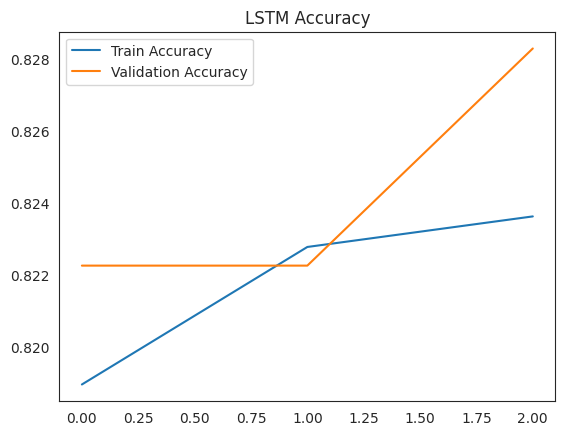

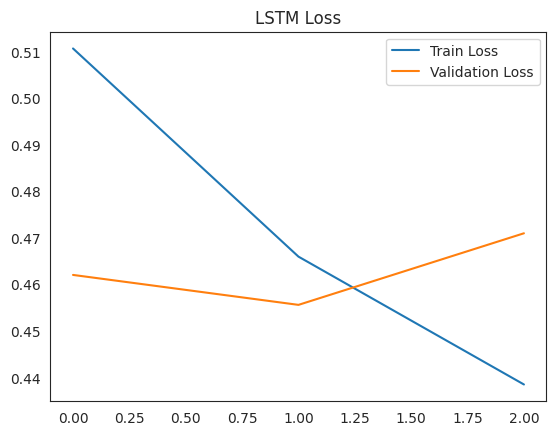

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
=== LSTM Results ===
              precision    recall  f1-score   support

           0       1.00      0.03      0.07       206
           1       0.83      1.00      0.91       953

    accuracy                           0.83      1159
   macro avg       0.91      0.52      0.49      1159
weighted avg       0.86      0.83      0.76      1159

LSTM Accuracy: 0.8283002588438308


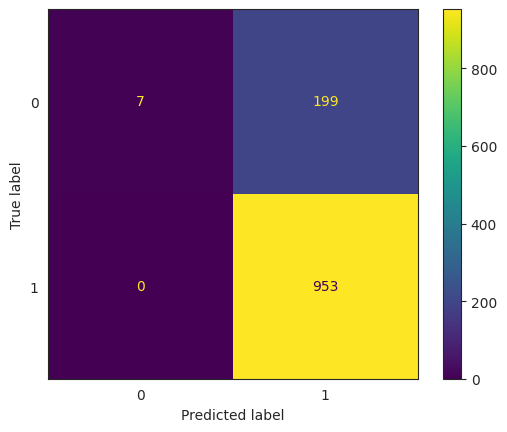

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  
tokenizer.fit_on_texts(df["Response"])  
X_seq = tokenizer.texts_to_sequences(df["Response"])  

# Padding
X_pad = pad_sequences(X_seq, maxlen=100, padding="post", truncating="post")  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=1)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

# Training/Validation Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("LSTM Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("LSTM Loss")
plt.show()

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Evaluation
print("=== LSTM Results ===")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Accuracy
score_lstm = accuracy_score(y_test, y_pred)
print("LSTM Accuracy:", score_lstm)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 3/3: 100%|██████████| 148/148 [10:41<00:00,  4.34s/it, loss=0.00934]


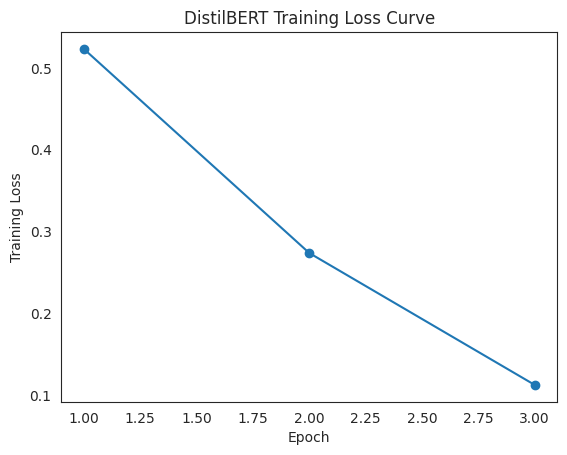

=== Improved DistilBERT Results ===
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       206
           1       0.96      0.96      0.96       953

    accuracy                           0.93      1159
   macro avg       0.89      0.88      0.88      1159
weighted avg       0.93      0.93      0.93      1159



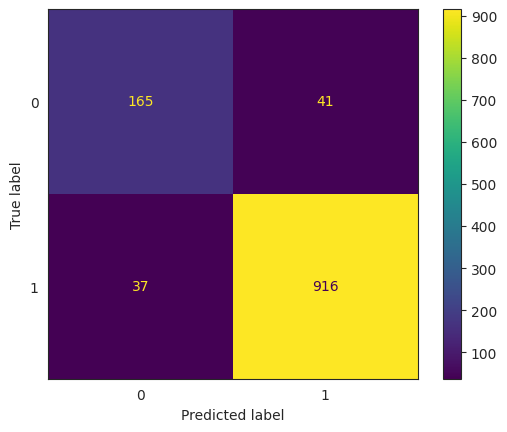

DistilBERT Accuracy: 0.9327006039689387


In [38]:
!pip install transformers torch --quiet

import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# Dataset Class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(label, dtype=torch.long)
        }

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df["Response"], y, test_size=0.33, random_state=1)

# Datasets
train_dataset = TextDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = TextDataset(X_test.tolist(), y_test.tolist(), tokenizer)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Model & Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# 🔹 Compute Class Weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Loss Function with Weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# Training Loop
epochs = 3
train_losses = []

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    epoch_loss = 0

    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}/{epochs}")
        loop.set_postfix(loss=loss.item())

    train_losses.append(epoch_loss / len(train_loader))

# Plot Training Loss Curve
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("DistilBERT Training Loss Curve")
plt.show()

# Evaluation
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Results
print("=== Improved DistilBERT Results ===")
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
plt.show()

bert_acc = accuracy_score(y_true, y_pred)
print("DistilBERT Accuracy:", bert_acc)
